In [72]:
!pip install ucimlrepo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 
  
# variable information 
print(df.variables) 


                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [14]:
print(X.isna().sum())
print(y.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64
Revenue    0
dtype: int64


In [16]:
print(X.info(), y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [19]:
print(y.value_counts())

Revenue
False      10422
True        1908
Name: count, dtype: int64


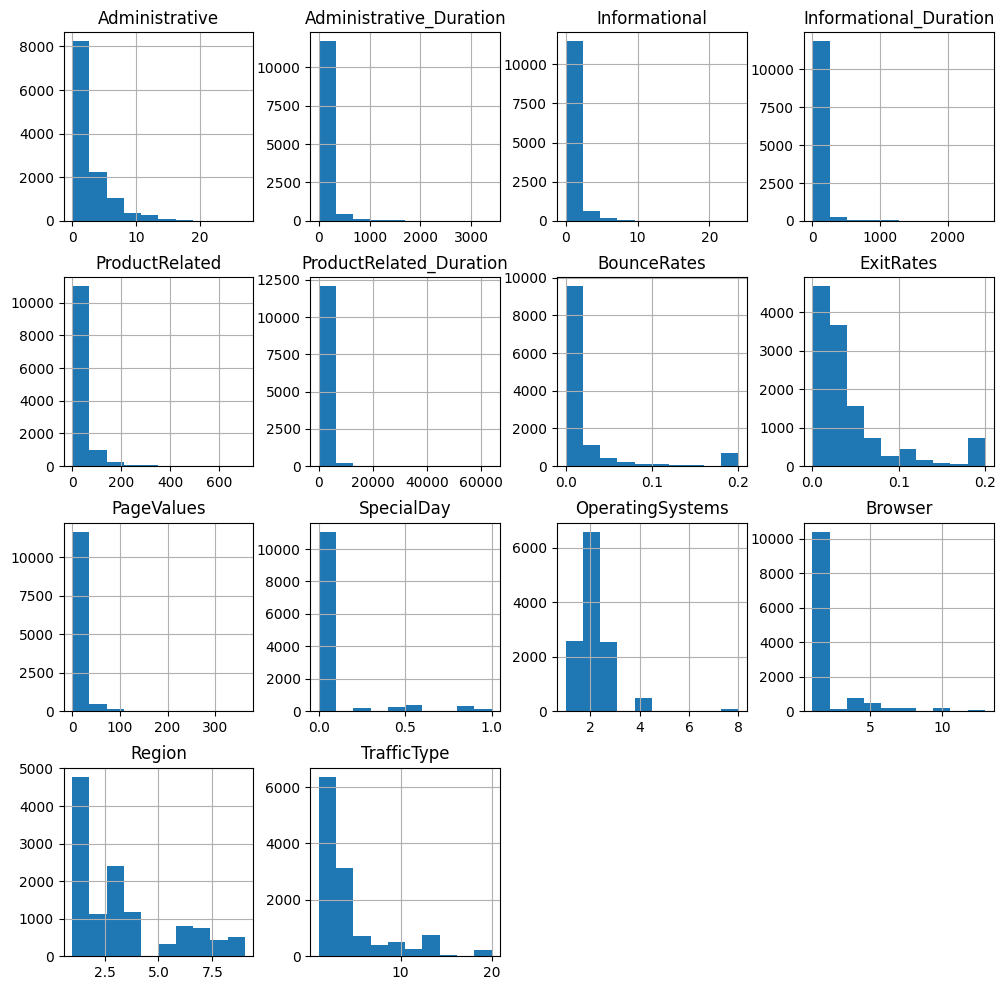

In [44]:
X.hist(figsize=(12,12))
plt.show()

<Axes: >

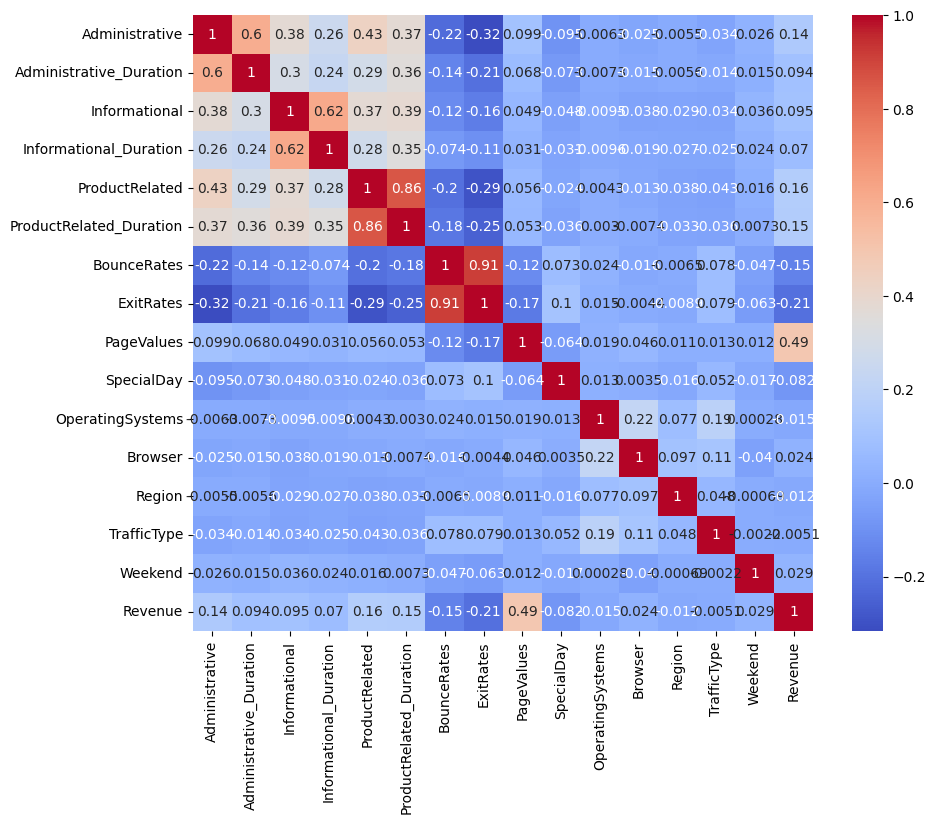

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.concat([X,y], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [52]:
print(df["VisitorType"].value_counts())

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


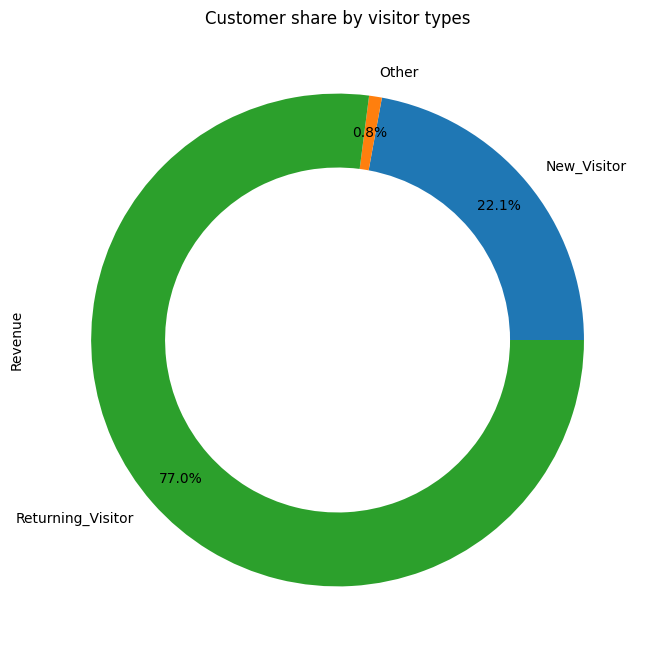

In [65]:
df.groupby(["VisitorType"])["Revenue"].sum().plot.pie(autopct='%1.1f%%',figsize=(8,8)
,wedgeprops={"width":0.3}, pctdistance=0.85,title="Customer share by visitor types")
plt.show()

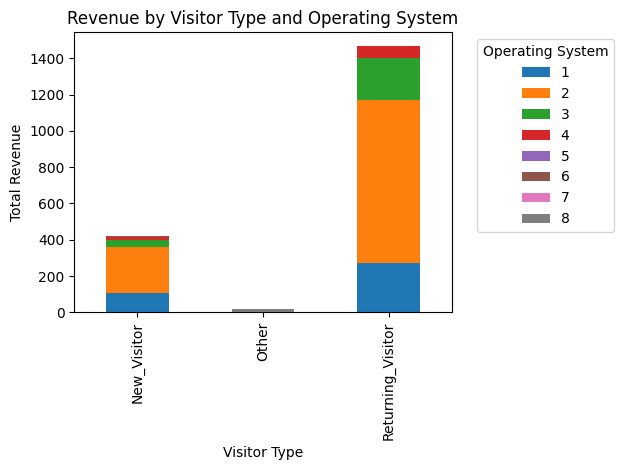

In [94]:
dataPl = df.groupby(["VisitorType", "OperatingSystems"])["Revenue"].sum().unstack()

dataPl.plot(kind="bar",stacked=True)
plt.title("Revenue by Visitor Type and Operating System")
plt.ylabel("Total Revenue")
plt.xlabel("Visitor Type")
plt.legend(title="Operating System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

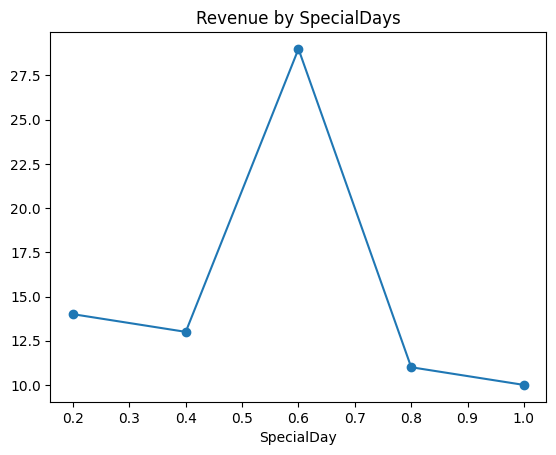

In [121]:
specialD = df[df["SpecialDay"]>0]
specialD.groupby("SpecialDay")["Revenue"].sum().plot(kind="line",marker='o')
plt.title("Revenue by SpecialDays")
plt.show()

In [114]:
print(df["Region"].value_counts())

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64


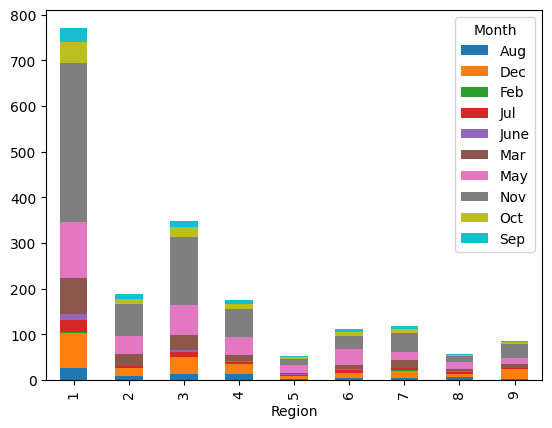

In [129]:
df.groupby(["Region","Month"])["Revenue"].sum().unstack().plot(kind="bar",stacked=True)
plt.show()

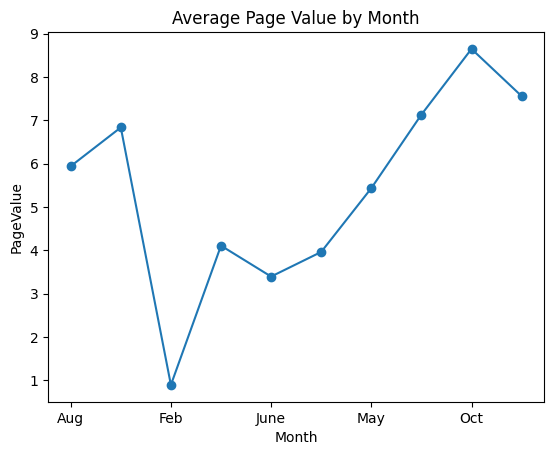

In [133]:
df.groupby("Month")["PageValues"].mean().sort_index().plot(kind="line", marker='o')
plt.title("Average Page Value by Month")
plt.ylabel("PageValue")
plt.show()


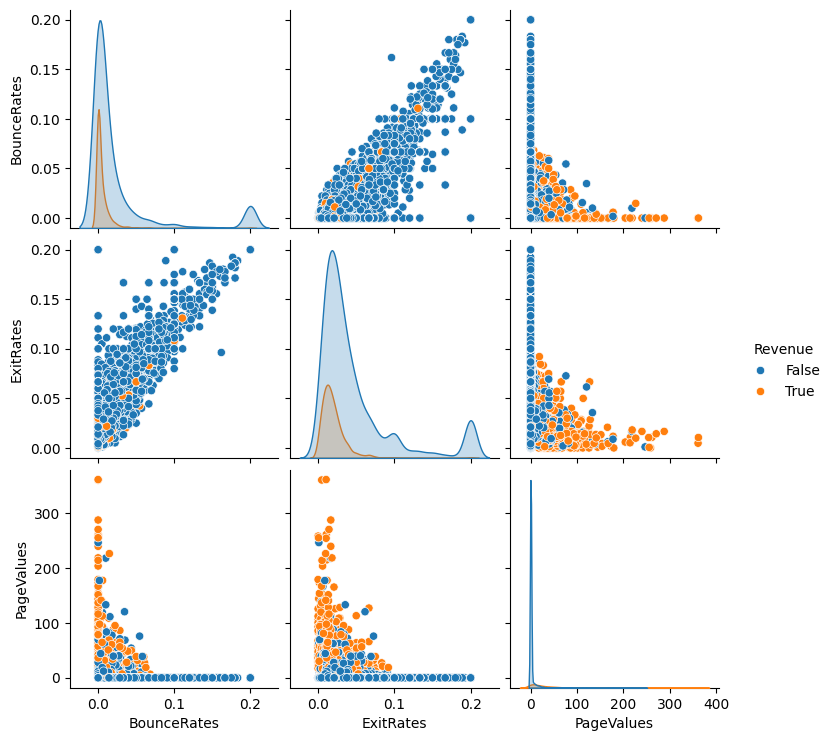

In [137]:
sns.pairplot(df[["BounceRates", "ExitRates", "PageValues", "Revenue"]], hue="Revenue")
plt.show()

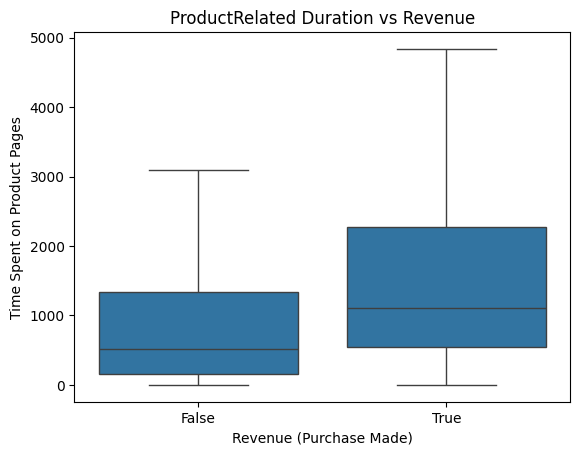

In [149]:
 # 0   Administrative           12330 non-null  int64  
 # 1   Administrative_Duration  12330 non-null  float64
 # 2   Informational            12330 non-null  int64  
 # 3   Informational_Duration   12330 non-null  float64
 # 4   ProductRelated           12330 non-null  int64  
 # 5   ProductRelated_Duration  12330 non-null  float64
# df.groupby("ProductRelated_Duration")["Revenue"].mean().plot(kind="bar")
sns.boxplot(data=df, x="Revenue", y="ProductRelated_Duration", showfliers=False)
plt.title("ProductRelated Duration vs Revenue")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Time Spent on Product Pages")
plt.show()

# plt.show()

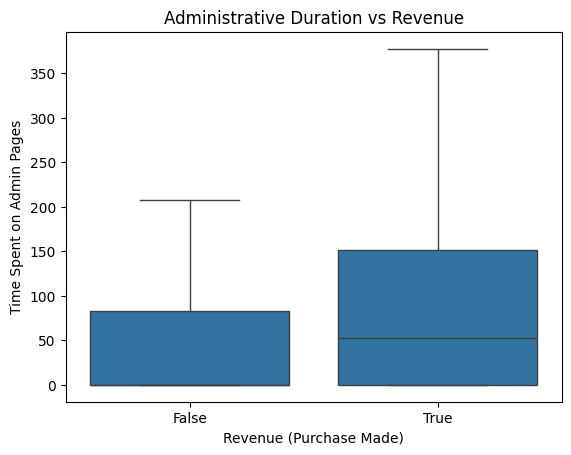

In [151]:
sns.boxplot(data=df, x="Revenue", y="Administrative_Duration", showfliers=False)
plt.title("Administrative Duration vs Revenue")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Time Spent on Admin Pages")
plt.show()

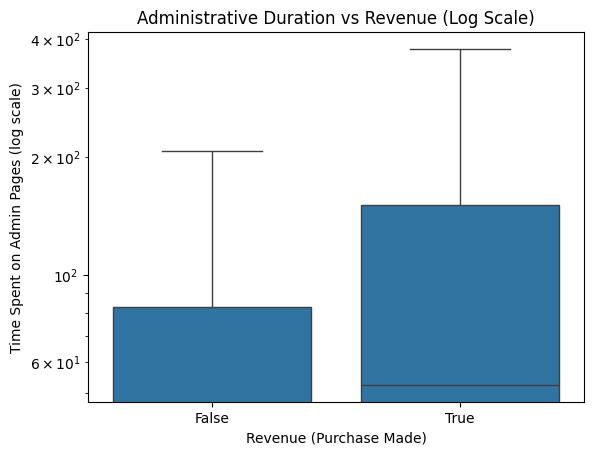

In [159]:
sns.boxplot(data=df, x="Revenue", y="Administrative_Duration", showfliers=False)
plt.yscale('log')
plt.title("Administrative Duration vs Revenue (Log Scale)")
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Time Spent on Admin Pages (log scale)")
plt.show()